In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
TF_USE_LEGACY_KERAS=1
version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras

In [30]:
with open('tic-tac-toe.names', 'r') as f:
    print(f.read())

1. Title: Tic-Tac-Toe Endgame database

2. Source Information
   -- Creator: David W. Aha (aha@cs.jhu.edu)
   -- Donor: David W. Aha (aha@cs.jhu.edu)
   -- Date: 19 August 1991
 
3. Known Past Usage: 
   1. Matheus,~C.~J., \& Rendell,~L.~A. (1989).  Constructive
      induction on decision trees.  In {\it Proceedings of the
      Eleventh International Joint Conference on Artificial Intelligence} 
      (pp. 645--650).  Detroit, MI: Morgan Kaufmann.
      -- CITRE was applied to 100-instance training and 200-instance test
         sets.  In a study using various amounts of domain-specific
         knowledge, its highest average accuracy was 76.7% (using the
         final decision tree created for testing).

   2. Matheus,~C.~J. (1990). Adding domain knowledge to SBL through
      feature construction.  In {\it Proceedings of the Eighth National
      Conference on Artificial Intelligence} (pp. 803--808). 
      Boston, MA: AAAI Press.
      -- Similar experiments with CITRE, includes 

In [31]:
names = ['x11', 'x12', 'x13', 'x21', 'x22', 'x23', 'x31', 'x32', 'x33', 'target']
df = pd.read_csv('tic-tac-toe.data', names=names, sep=',')
df.head()

,x11,x12,x13,x21,x22,x23,x31,x32,x33,target
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [32]:
x = df.drop('target', axis=1)
y = df['target']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [34]:
mapping = {"x":1, "o":0, "b":0.5}
for col in x_train.columns:
    x_train[col] = x_train[col].map(mapping)

for col in x_test.columns:
    x_test[col] = x_test[col].map(mapping)

In [35]:
train = x_train.iloc[:].to_numpy()
test = x_test.iloc[:].to_numpy()

In [36]:
train_arr = []
for i in range(len(train)):
    train_arr.append(train[i].reshape(3,3))

test_arr = []
for i in range(len(test)):
    test_arr.append(test[i].reshape(3,3))

In [37]:
train_arr = np.array(train_arr)
test_arr = np.array(test_arr)

In [38]:
target_map = {'positive':1, 'negative':0}
y_test = y_test.map(target_map)
y_train = y_train.map(target_map)

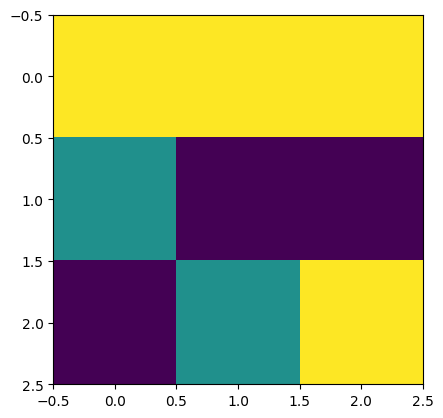

In [39]:
plt.imshow(train_arr[0])
plt.show()

In [40]:
class CNNBlock(keras.layers.Layer):
    def __init__(self, out_channels, kernel_size=3):
        super(CNNBlock, self).__init__()
        self.conv = keras.layers.Conv2D(out_channels, kernel_size, padding="same")
        self.bn = keras.layers.BatchNormalization()
    def __call__(self,inputs, training=False):
        x = self.conv(inputs)
        x = self.bn(x, training=training)
        x = tf.nn.relu(x)
        return x

In [43]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(3,3,1)),
    CNNBlock(16),
    CNNBlock(32),
    CNNBlock(64),
    keras.layers.Flatten(),
    keras.layers.Dense(128),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [44]:
y_test = np.asarray(y_test).reshape(-1,1)
y_train = np.asarray(y_train).reshape(-1,1)

In [45]:
test_arr = test_arr.reshape(-1, 3, 3, 1)
train_arr = train_arr.reshape(-1, 3, 3, 1)

In [46]:
model.fit(train_arr, y_train, epochs=10, verbose=1)
model.evaluate(test_arr, y_test)

Epoch 1/10


21/21 [==============================] - 22s 6ms/step - loss: 0.5915 - accuracy: 0.6940
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.7328
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 0.4300 - accuracy: 0.7940
Epoch 4/10
21/21 [==============================] - 0s 6ms/step - loss: 0.2769 - accuracy: 0.8970
Epoch 5/10
21/21 [==============================] - 0s 5ms/step - loss: 0.1197 - accuracy: 0.9552
Epoch 6/10
21/21 [==============================] - 0s 5ms/step - loss: 0.0441 - accuracy: 0.9925
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.9910
Epoch 8/10
21/21 [==============================] - 0s 5ms/step - loss: 0.0305 - accuracy: 0.9940
Epoch 9/10
21/21 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9985
Epoch 10/10
9/9 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9653


[0.1135663092136383, 0.9652777910232544]